<a href="https://colab.research.google.com/github/missjanki/Introduction-to-Machine-Learning-/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

**LOADING DATASET**

In [120]:
data = pd.read_excel('/content/EPSILON PRIME AND DOUBLE PRIME.xlsx')
data.sample(5)

,Concentration,Frequency,epsilon prime,epsilon double prime
1914,0.44,8433.93,10.908740,10.988636
181,0.00,669931.00,17.177029,1.207948
1178,0.24,422698.00,13.640289,0.585653
117,0.00,16827.90,17.341841,48.241725
1277,0.28,1191.32,13.112483,152.800874


In [121]:
sc = StandardScaler()
scaled_data = sc.fit_transform(data)  # Assuming 'data_ml' is your original dataset

# Create DataFrame with the appropriate number of columns
data = pd.DataFrame(scaled_data, columns=['Concentration', 'Frequency', 'epsilon prime', 'epsilon double prime'])  # Adjust column names accordingly
# In the above line, replace 'additional_column' with the appropriate name if there's an extra column present in the transformed data


**DATA VISUALIZATION**

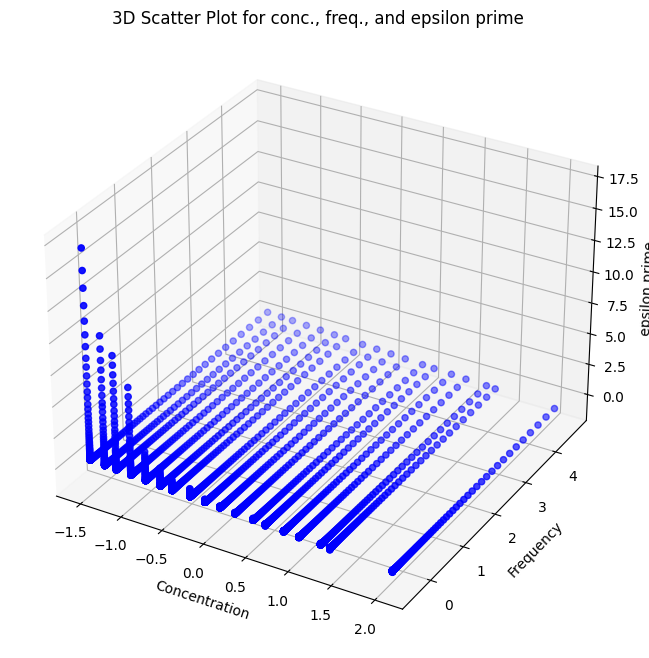

In [122]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Concentration'], data['Frequency'], data["epsilon prime"], c='blue', marker='o')
ax.set_xlabel('Concentration')
ax.set_ylabel('Frequency')
ax.set_zlabel("epsilon prime")
plt.title("3D Scatter Plot for conc., freq., and epsilon prime")
plt.show()

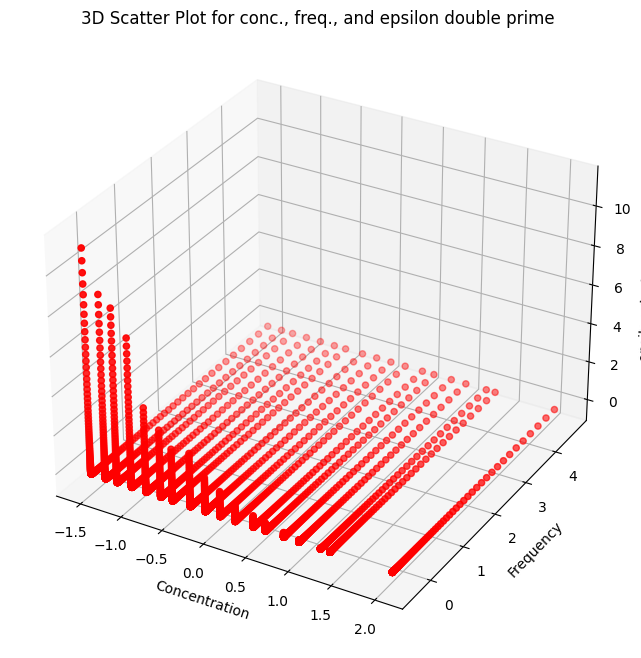

In [123]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Concentration'], data['Frequency'], data['epsilon double prime'], c='red', marker='o')
ax.set_xlabel('Concentration')
ax.set_ylabel('Frequency')
ax.set_zlabel('epsilon double prime')
plt.title('3D Scatter Plot for conc., freq., and epsilon double prime')
plt.show()

**MODEL: RANDOM FOREST**

EPSILON PRIME

In [124]:
X = data.drop('epsilon prime', axis=1)        #input variable
Y = data['epsilon prime']                     #target variable

In [125]:
print(X)

      Concentration  Frequency  epsilon double prime
0         -1.537379  -0.457158             11.146447
1         -1.537379  -0.457155             10.527300
2         -1.537379  -0.457152              9.945604
3         -1.537379  -0.457149              9.393377
4         -1.537379  -0.457145              8.870185
...             ...        ...                   ...
3613       2.051833   3.626289             -0.285272
3614       2.051833   3.868241             -0.285272
3615       2.051833   4.124536             -0.285272
3616       2.051833   4.396022             -0.285272
3617       2.051833   4.683599             -0.285273

[3618 rows x 3 columns]


In [126]:
print(Y)

0       16.997344
1       15.286212
2       13.937844
3       12.597034
4       11.400223
          ...    
3613    -0.782086
3614    -0.782107
3615    -0.782163
3616    -0.782221
3617    -0.782303
Name: epsilon prime, Length: 3618, dtype: float64


In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [128]:
# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)  # Using 100 trees
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [129]:
# Make predictions on the test set
Y_pred = model.predict(X_test)
print(Y_pred)

[ 0.99070519 -0.28042947 -0.57650446 ... -0.57621334 -0.38675715
 -0.47250216]


In [130]:
model.predict([[0.34,	7962.14, 25.691926]])

array([14.35584714])

In [131]:
# Features for prediction (example values)
new_data = [[0.34, 7962.14, 25.691926]]

# Make predictions for the new data
predicted_values = model.predict(new_data)

# Display predicted values
for i, pred in enumerate(predicted_values):
    print(f"Predicted value for sample: {pred}")

Predicted value for sample: 14.355847138093004


In [132]:
from sklearn.metrics import accuracy_score, r2_score

# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = r2_score(Y_train, X_train_prediction)
print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.9969520780218716


In [133]:
from sklearn.metrics import accuracy_score

# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = r2_score(Y_test, X_test_prediction)
print('Accuracy score of the test data:', test_data_accuracy)

Accuracy score of the test data: 0.991828296976873


In [134]:
r2_score(Y_test, Y_pred)

0.991828296976873

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r_squared = r2_score(Y_test, Y_pred)

# Print the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 0.015081302403747937
Mean Squared Error: 0.00961045001654258
Root Mean Squared Error: 0.09803290272425161
R-squared: 0.991828296976873


In [136]:
pred_Y_df = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': Y_pred, 'Difference': Y_test-Y_pred})
pred_Y_df[0:20]

,Actual Value,Predicted Value,Difference
227,1.089265,0.990705,9.855996e-02
2291,-0.280547,-0.280429,-1.171323e-04
3304,-0.576487,-0.576504,1.701157e-05
2161,-0.242835,-0.242933,9.796499e-05
2545,-0.353966,-0.353966,-1.821421e-07
2810,-0.414470,-0.414560,9.008548e-05
2453,-0.316062,-0.315933,-1.285387e-04
2677,-0.389385,-0.389613,2.278498e-04
1980,-0.169789,-0.169770,-1.909997e-05
2012,-0.175769,-0.177063,1.294146e-03


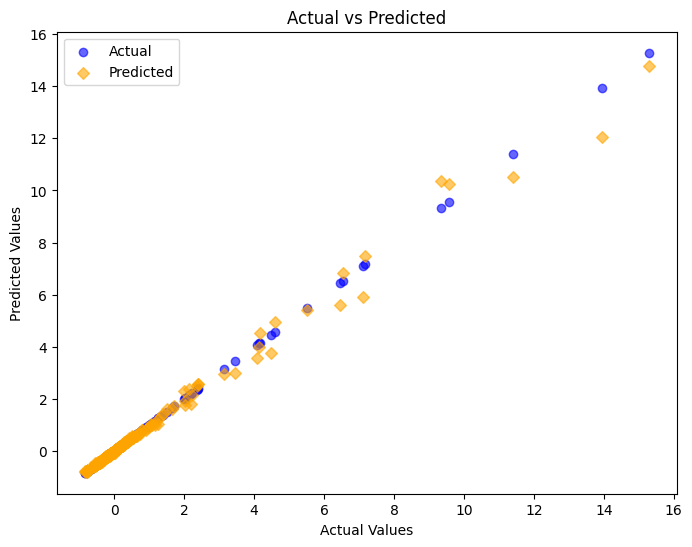

In [137]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test, color='blue', marker='o', label='Actual', alpha=0.6)
plt.scatter(Y_test, Y_pred, color='orange', marker='D', label='Predicted', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

DOUBLE EPSILON PRIME

In [138]:
X = data.drop('epsilon double prime', axis=1)        #input variable
Y = data['epsilon double prime']                     #target variable

In [139]:
print(X)

      Concentration  Frequency  epsilon prime
0         -1.537379  -0.457158      16.997344
1         -1.537379  -0.457155      15.286212
2         -1.537379  -0.457152      13.937844
3         -1.537379  -0.457149      12.597034
4         -1.537379  -0.457145      11.400223
...             ...        ...            ...
3613       2.051833   3.626289      -0.782086
3614       2.051833   3.868241      -0.782107
3615       2.051833   4.124536      -0.782163
3616       2.051833   4.396022      -0.782221
3617       2.051833   4.683599      -0.782303

[3618 rows x 3 columns]


In [140]:
print(Y)

0       11.146447
1       10.527300
2        9.945604
3        9.393377
4        8.870185
          ...    
3613    -0.285272
3614    -0.285272
3615    -0.285272
3616    -0.285272
3617    -0.285273
Name: epsilon double prime, Length: 3618, dtype: float64


In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [142]:
# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)  # Using 100 trees
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [143]:
# Make predictions on the test set
Y_pred = model.predict(X_test)
print(Y_pred)

[ 2.02192694 -0.27890248 -0.28518992 ... -0.28510636 -0.27703243
 -0.28527114]


In [144]:
# Features for prediction (example values)
new_data = [[ 0.00,	532145.00,	17.182987	]]

# Make predictions for the new data
predicted_values = model.predict(new_data)

# Display predicted values
for i, pred in enumerate(predicted_values):
    print(f"Predicted value for sample: {pred}")

Predicted value for sample: 10.199500845974594


In [145]:
from sklearn.metrics import accuracy_score, r2_score

# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = r2_score(Y_train, X_train_prediction)
print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.9993942189050868


In [146]:
from sklearn.metrics import accuracy_score

# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = r2_score(Y_test, X_test_prediction)
print('Accuracy score of the test data:', test_data_accuracy)

Accuracy score of the test data: 0.9980042497930403


In [147]:
r2_score(Y_test, Y_pred)

0.9980042497930403

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r_squared = r2_score(Y_test, Y_pred)

# Print the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 0.011570368648160925
Mean Squared Error: 0.002084146620314261
Root Mean Squared Error: 0.04565245470195728
R-squared: 0.9980042497930403


In [149]:
pred_Y_df = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': Y_pred, 'Difference': Y_test-Y_pred})
pred_Y_df[0:20]

,Actual Value,Predicted Value,Difference
227,1.904438,2.021927,-1.174892e-01
2291,-0.279118,-0.278902,-2.155628e-04
3304,-0.285188,-0.285190,1.444564e-06
2161,-0.285119,-0.285096,-2.371381e-05
2545,-0.285040,-0.285038,-1.906351e-06
2810,-0.285464,-0.285463,-6.584944e-07
2453,-0.243083,-0.242462,-6.209998e-04
2677,-0.279056,-0.278865,-1.904866e-04
1980,-0.285195,-0.285195,-2.618471e-07
2012,0.474638,0.479862,-5.223958e-03


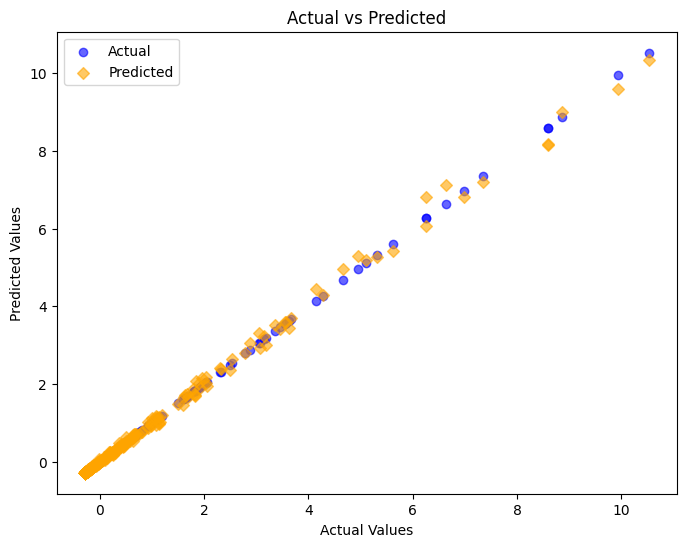

In [150]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test, color='blue', marker='o', label='Actual', alpha=0.6)
plt.scatter(Y_test, Y_pred, color='orange', marker='D', label='Predicted', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()